In [ ]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('max_columns', None)

# DataFrame에 data row 추가하기

## `loc[]`을 사용하여 추가하기

In [ ]:
df = pd.DataFrame(columns=['a', 'b'])
df.head()

### Add data as 'list'

In [ ]:
df.loc[0] = [1, 2]
df.head()

In [ ]:
df.loc['ㅋㅋ'] = [1, 2]
df.head()

### Add data as 'dict'

In [ ]:
df.loc[len(df)] = {'b' : 'ㅎ', 'a': 'ㅋ'}
df.head()

### Add data as 'Series'

In [ ]:
df.loc["yay"] = pd.Series({'a': 'ㅋ', 'b' : 'ㅎ'})
df.tail()

In [ ]:
# 이미 존재한는 index에 넣기 
df.loc["yay"] = pd.Series({'a': '1111', 'b' : '2222'})
df.tail()

- 위 방법들은 다 inplace 방식

## `append()` 사용하여 추가하기

- 위의 `loc`과는 다르게 not in-place(returns a new copy of the DataFrame)

- `append()` : it only accecpt
    - DataFrame
    - Series
    - Dictionary
    - list of these(**Not `list` itself**)

In [ ]:
names_df = pd.DataFrame(
    {
        'Name':['철수', '영희', '영수', '영미'],
        'Age':[12, 13, 14, 15]
    },
    index = ['Canada', 'Canada', 'USA', 'USA']
)
names_df

In [ ]:
# Error (에러내용 확인!) => index를 뭐로 설정해야될지 모르기 때문
names_df.append(
    {'Name':'명수', 'Age':1}
)

### `ignore_index=True`

- 이전 index를 다 reset한다

In [ ]:
names_df.append( 
    {'Name':'명수', 'Age':100},
    ignore_index=True
)

In [ ]:
# 리스트 of 딕셔너리로도 전달 가능
names_df.append(
    [
        {'Name':'명수', 'Age':1},
        {'Name':'동수', 'Age':2}
    ], 
    ignore_index=True
)

In [ ]:
# append()는 내부적으로 copy()를 하기 때문에, 원본은 그대로 유지
names_df

### Original index 유지하기 => `append()` 할 때, `dict`대신에 `Series`를 전달하면 됨

- 참고: `Series`를 `append`를 할 때는, `Series`의 index가 target DataFrame의 column이 되고, name이 target DataFrame의 index가 됨

In [ ]:
# `name` arg를 통해서 Series의 name을 부여하기
s = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names_df))
s

In [ ]:
names_df.append(s)

In [ ]:
# 리스트 of Series로도 전달 가능
s1 = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names_df))
s2 = pd.Series({'Name': 'Zayd', 'Age': 2}, name='USA')
names_df.append([s1, s2])

- 참고: Series의 `name`은 어떤 operation을 하느냐에 따라서, index or column이 될 수 있음

In [ ]:
pd.concat([s1, s2], axis=1)

# concat, join, and merge 

## `concat()` 

- DataFrame or Series object를 수직적으로 or 수평적으로 '연결'
- **index(or columns)**에 대해 algin (not values)
- Defaults to `outer` join
    - operation axis에 따라 concat되는 object의 column or index가 union됨

- 예제

In [ ]:
import FinanceDataReader as fdr

In [ ]:
samsung_df = fdr.DataReader('005390', '2009-01-01', '2017-12-31')
kodex_df = fdr.DataReader('069500', '2016-01-01', '2017-12-31')

In [ ]:
samsung_df.head(2)
kodex_df.head(2)

In [ ]:
pd.concat(
    [samsung_df, kodex_df]
) 

- Column, Index alignment 특징은 그대로 적용됨!

In [ ]:
kodex_df[['Open', 'Close']].head()

In [ ]:
pd.concat(
    [
        samsung_df, 
        kodex_df[['Open', 'Close']]
    ]
).tail(2)   # head()도 한번 실행해보세요!

- `keys`, `names` args

In [ ]:
pd.concat(
    [samsung_df, kodex_df],
    keys=['삼성', 'KODEX200'], 
).head()

In [ ]:
pd.concat(
    [samsung_df, kodex_df],
    keys=['삼성', 'KODEX200'],
    names=['종목명']
).head()

In [ ]:
pd.concat(
    [samsung_df, kodex_df],
    keys=['삼성', 'KODEX200'],
    names=['종목명', '날짜']
).head()

- On `axis` = 1  

In [ ]:
pd.concat([samsung_df, kodex_df], axis=1).head()

In [ ]:
pd.concat([samsung_df, kodex_df], keys=['삼성', 'KODEX200'], axis=1).head(2)

- `join`  argument
    - How to handle **indexes** on **other** axis(es). 즉, concat의 대상이 되는(=명시되는) axis 말고, 다른 axis에 대해 어떻게 join할 것인가

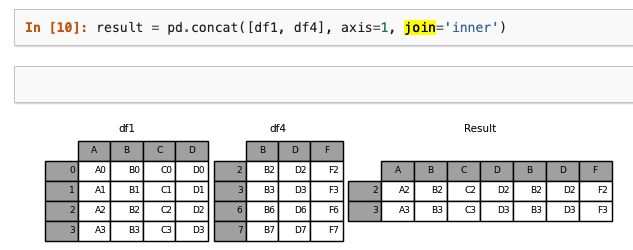

In [ ]:
# default 'outer' join
pd.concat([samsung_df, kodex_df], keys=['삼성', 'kodex'], axis=1, names=['종목명']).head()

In [ ]:
# join = inner (date intersection)
pd.concat([samsung_df, kodex_df], keys=['삼성', 'kodex'], axis=1, names=['종목명'], join='inner').head()

In [ ]:
# concat 방향이 axis=0이니까, axis=1에 대해서 join이 적용됨
pd.concat([samsung_df.head(), kodex_df[['Close']].head()], join='inner')

- 주의 : `outer` join & column 명이 서로 겹치는 게 없을 때 ! => alignment 가 일치하는게 없으니 NaN으로 메꾼다!

In [ ]:
samsung_diff_col_df = samsung_df.copy()
samsung_diff_col_df.columns = ['1_' + col  for col in samsung_df.columns]
samsung_diff_col_df.head()

In [ ]:
samsung_df.head()

In [ ]:
pd.concat([samsung_diff_col_df, kodex_df]).head()

### 실전예제: concat을 이용해서 close 데이터만 뽑아내기

In [ ]:
total_df = pd.concat([samsung_df, kodex_df], keys=['삼성', 'kodex200'], names=['종목명'])
total_df.head()
total_df.tail()

In [ ]:
total_df = total_df.reset_index()
total_df.head()

In [ ]:
total_df.pivot(index='Date', columns='종목명', values='Close')

- `pivot()` 예시

In [ ]:
sample_data = pd.DataFrame(
    {
        "종목명":["삼성", "현대", "하이닉스", "삼성", "현대", "하이닉스"],
        "datetime":["2019-01-01", "2019-01-01", "2019-01-01", "2019-01-02", "2019-01-02", "2019-01-02"],
        "price":[1,2,3, 4,5,6]
    }
)
sample_data

In [ ]:
sample_data.sort_values("종목명")

In [ ]:
sample_data.pivot(index="datetime", columns="종목명", values="price")

## `join()`

- 2개의 (보통 index가 다른) dataframe을 하나의 dataframe으로 합칠 때 사용
- Aligns the calling DataFrame's **column(s) or index** with the other DataFrame's **index** 
    1. index - index
    2. columns - index (calling object는 column, called object는 index)
        - `on` arg = calling object의 column
            - called object의 index를 calling object의 "어떤 column"에 맞출것인가 
        - `set_index()` 후,  `on`없이 index-index join과 같은 결과 
- Cartesian product joining
- Defaults to `left` join
- 대부분의 경우 merge랑 호환 가능

- 예제1

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

In [ ]:
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [ ]:
left
right

In [ ]:
left.join(right)

In [ ]:
left.join(right, how='outer')

- 예제2

In [ ]:
left = pd.DataFrame(
    {
        'A':['A0', 'A1', 'A2', 'A3'],
        'B':['B0', 'B1', 'B2', 'B3'],
        'key':['K0', 'K1', 'K0', 'K1'],
    }
)
right = pd.DataFrame(
    {
        'C':['C0', 'C1'],
        'D':['D0', 'D1'],
    },
    index=['K0', 'K1']
)
left
right

- 아래 둘은 결과 같음

In [ ]:
# left.join(right, on='key')
left.join(right, on='key').set_index("key")

In [ ]:
# left.set_index('key')
left.set_index('key').join(right)

- l_suffix, r_suffix

In [ ]:
a = pd.DataFrame([1,2,3], index=['a','b','c'], columns=['안녕'])
b = pd.DataFrame([4,2,6], index=['a','c','d'], columns=['안녕'])
a
b

In [ ]:
a.join(b, lsuffix="_x", rsuffix="_y", how="inner")

- 예제3 (앞의 lec1\_3에서 median_시가총액 연결하기)

In [ ]:
a_df = pd.read_csv("my_data/Small_and_Big.csv", index_col=[0])
a_df.head()

In [ ]:
median_df = a_df.groupby(['date']).agg({'시가총액 (보통)(평균)(원)': 'median'})
median_df.columns = ['시가총액_median']
median_df.head()

In [ ]:
joined_df = a_df.join(median_df, on="date")
joined_df.head()

In [ ]:
joined_df[joined_df['date'] == "2000-08-31"].head()

In [ ]:
# Hint: 아래와 같은 느낌으로 하시면 됩니다.
# cond1 = joined_df['시가총액(보통~~)'] <  joined_df['시가총액_median']
# joined_df.loc[cond1, "small_or_big"] = "small"
# joined_df.loc[~cond1, "small_or_big"] = "big"

## `merge()`

- Aligns the calling DataFrame's *column(s)* with the other DataFrame's *column(s)*
    - `left_index`, `right_index` argument도 존재하긴 함(index-index alignment시)
    - `join()`
        - 사실 내부적으로 `reset_index()` 하고 `merge()` 호출함
- Cartesian product joining
- Defaults to `inner` join
- `concat()`과 달리, index, column명이 아니라, value 값 자체를 이용한 join

In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
left
right

In [ ]:
# default: inner join(교집합)
pd.merge(left, right, on=['key1', 'key2'])

In [ ]:
# outer join(합집합)
pd.merge(left, right, how='outer', on=['key1', 'key2'])

In [ ]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

In [ ]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

- More about Cartesian product joining

In [ ]:
left = pd.DataFrame({'A':[1,2,], 'B':[2,2]})
right = pd.DataFrame({'A':[4,5,6], 'B':[2,2,2]})
left
right

In [ ]:
# left, right, inner, outer 결과가 다 같음
pd.merge(left, right, on="B", how='left')

- 예제

In [ ]:
close_df = samsung_df['Close'].reset_index()
vol_df = samsung_df['Volume'].reset_index()

In [ ]:
close_df.head()
vol_df.head()

In [ ]:
vol_df.iloc[:2]

In [ ]:
# default is 'inner' join
pd.merge(close_df, vol_df.iloc[:2])   # 알아서 같은 column 이름끼리 맞춤

In [ ]:
# 'outer' join
pd.merge(close_df, vol_df.iloc[:2], how="outer").head(5)

## join & merge 각각 언제 사용?

- index가 하나라도 관여하면 => `join()`
- 둘다 colum에 맞춰야하면 => `merge()`
- `merge()` 사용시, `left_index`, `right_index` 사용하면 `join()`과 결과가 같음
- `join()` 사용시 `reset_index()`하고, `merge()` 써도 됨

In [ ]:
a = pd.DataFrame([1,2,3], index=['a','b','c'], columns=['안녕'])
b = pd.DataFrame([4,2,6], index=['a','c','d'], columns=['안녕'])
a
b

In [ ]:
a.merge(b)

In [ ]:
a.reset_index().merge(b.reset_index())

In [ ]:
a.merge(b, left_index=True, right_index=True)

In [ ]:
a.join(b, lsuffix="_x", rsuffix="_y", how="inner")

### Concat과 join,merge와의 차이

In [ ]:
a = pd.DataFrame({"a": [1,2,3],}, index=[1,2,3])
b = pd.DataFrame({"b": [1,4,5],}, index=[1,4,5])
a
b

In [ ]:
pd.concat([a, b], axis=1)

In [ ]:
a = pd.DataFrame({"a": [1,2,3],}, index=[1,2,2])
b = pd.DataFrame({"b": [1,4,5],}, index=[1,4,5])
a
b

In [ ]:
# error 발생! => concat()을 cartesian product가 불가능하기 때문에, 중복 index 혹은 column이 있는 경우 작동하지 못함
pd.concat([a, b], axis=1)

# 실전예제

## flipkart

In [ ]:
product_df = pd.read_csv("my_data/product.csv", index_col=0)
review_df = pd.read_csv("my_data/review.csv", index_col=0)

In [ ]:
product_df.shape
review_df.shape

In [ ]:
product_df.head(2)
review_df.head(2)

In [ ]:
flipkart_df = pd.merge(
    product_df, 
    review_df, 

    left_on="id",
    right_on='product__id',
    
    how='right',    # Review에 있는 id, 즉 product__id를 기준으로 데이터를 생성합니다. 만약 "product" 정보가 반드시 존재하는 review들로만 데이터를 구성하고 싶으면 "left"로 하시면 됩니다.
)  

In [ ]:
flipkart_df.shape
flipkart_df.head(2)

In [ ]:
# column을 제거 하기 위해서는 drop([컬럼1, 컬럼2, ..], axis=1)과 같은 방식으로 진행합니다
flipkart_df = flipkart_df.drop(['id', 'product__id', 'author'], axis=1)
flipkart_df.head(2)

## Amazon

In [ ]:
amazon_df = pd.read_csv("my_data/amazon_review1.csv", index_col=0)
amazon_df.head(2)

## 데이터 합치기

In [ ]:
amazon_df.shape
flipkart_df.shape

In [ ]:
df = pd.concat([amazon_df, flipkart_df], axis=0)   # `keys` argument를 활용하셔서 site를 구분하셔도 됩니다
df.shape

In [ ]:
df.head()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].astype(float)

df.set_index('date', inplace=True)
df = df.loc[:"2017-12-31"]   # 비록 DatetimeIndex이지만, 날짜를 문자열 string으로 표현하여 loc을 이용한 range indexing이 가능합니다.

df.rename(columns={'title_x':'name', 'title_y':'title'}, inplace=True)

df['price_grp'] = pd.cut(df['price'], [0, 5000, 15000, 200000], labels=["저가", "중가", "고가"])

In [ ]:
df.head()

## 전체제품 기간별 제품 평균가격

In [ ]:
# 아래에서 보이시는 것처럼 groupby()의 인자에는 반드시 'column명'이 아니어도 됩니다.
# 아래 예제처럼 df라는 object로부터 추출할 수 있는(여기서는 df.index에서 추출한) categorical 변수들을 사용해도 됩니다.
df.groupby([df.index.year, df.index.quarter]).agg({'price':'mean'})

In [ ]:
df.groupby([df.index.year, df.index.quarter]).agg({'price':'mean'}).plot(kind='bar')

In [ ]:
%matplotlib inline

In [ ]:
ax = df.resample("Q")['price'].mean().plot();

ax.set_title("기간별 제품 평균가격");
ax.set_xlabel("기 간");
ax.set_ylabel("가 격");

## 브랜드별 리뷰수

In [ ]:
df.groupby(['brand']).agg({'name':'count'})

In [ ]:
df.groupby(['brand']).agg({'name':'count'}).plot(kind='bar', figsize=(8,5));